J'ai crée se notebook juste pour éviter les problèmes de merge avec git (les .ipynb merge tres mal :-/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [2]:
# Load iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df['target'] = pd.Series(iris.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()
df_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [4]:
# Apply PCA
pca = decomposition.PCA(n_components=4)
principalDf = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4'])
principalDf

,Component #1,Component #2,Component #3,Component #4
0,-2.257141,0.478424,-0.127280,-0.024088
1,-2.074013,-0.671883,-0.233826,-0.102663
2,-2.356335,-0.340766,0.044054,-0.028282
3,-2.291707,-0.595400,0.090985,0.065735
4,-2.381863,0.644676,0.015686,0.035803
...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957
146,1.559356,-0.893693,-0.026283,-0.219457
147,1.516091,0.268171,0.179577,-0.118773
148,1.368204,1.007878,0.930279,-0.026041


In [5]:
# Append the target Label columns
df = pd.concat([df, pd.Series(iris.target, name='target')], axis = 1)

finalDf = pd.concat([principalDf, pd.Series(iris.target, name='target')], axis = 1)
finalDf

,Component #1,Component #2,Component #3,Component #4,target
0,-2.257141,0.478424,-0.127280,-0.024088,0
1,-2.074013,-0.671883,-0.233826,-0.102663,0
2,-2.356335,-0.340766,0.044054,-0.028282,0
3,-2.291707,-0.595400,0.090985,0.065735,0
4,-2.381863,0.644676,0.015686,0.035803,0
...,...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957,2
146,1.559356,-0.893693,-0.026283,-0.219457,2
147,1.516091,0.268171,0.179577,-0.118773,2
148,1.368204,1.007878,0.930279,-0.026041,2


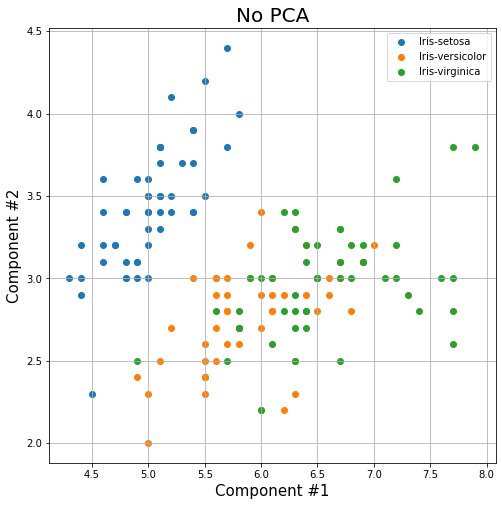

In [6]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

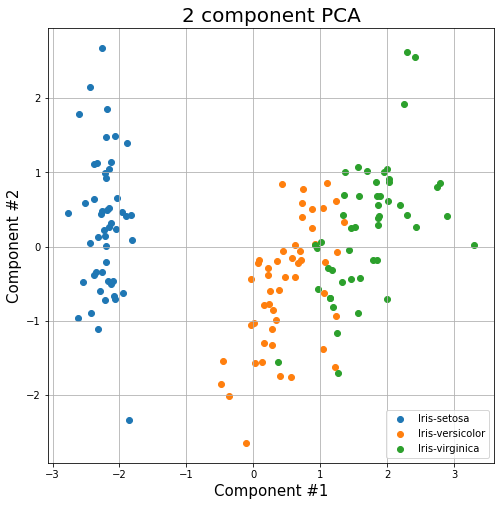

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idt, _ in enumerate(targets):
    ax.scatter(finalDf[finalDf['target'] == idt].iloc[:,0], 
               finalDf[finalDf['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.show()

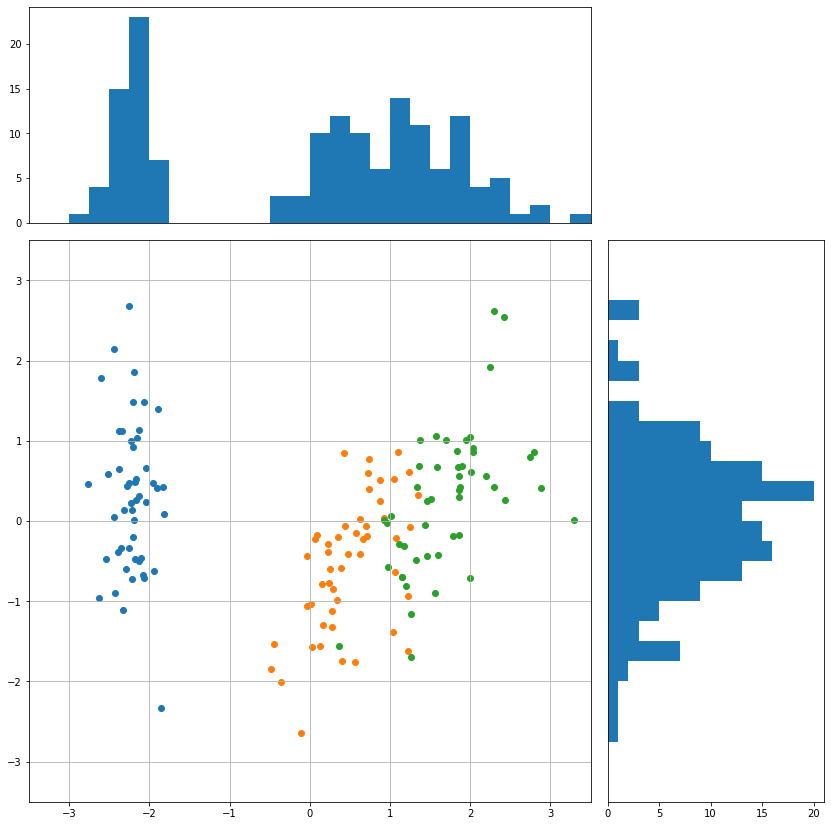

In [8]:
x = finalDf.iloc[:,0]
y = finalDf.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(finalDf[finalDf['target'] == idt].iloc[:,0], 
               finalDf[finalDf['target'] == idt].iloc[:,1])
    
axScatter.grid()

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

plt.show()

-----

In [9]:
# Synthetic data
N = 900
df = pd.DataFrame()

df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 7, N)
df['particle 1'] =  np.random.normal(10, 7,N)
df['particle 2'] =  np.hstack([np.random.normal(30, 7,N//2), np.random.normal(10, 7,N//2)])
df['death'] = df['particle 1']*100 + 10*df['age']
df['other'] = df['particle 2']*25


print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()
print('Normalized data')
display(df_norm)


# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)
display(PCA_df)


# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

Synthetic data


,age,particle 1,particle 2,death,other
0,14.016145,11.729455,29.120868,1313.106913,728.021707
1,21.281275,14.899851,35.161418,1702.797804,879.035459
2,16.031116,13.554330,45.287591,1515.744132,1132.189769
3,17.990126,9.767235,37.679163,1156.624795,941.979074
4,16.753947,14.322565,31.853949,1599.795989,796.348730
...,...,...,...,...,...
895,96.816259,15.543063,0.343786,2522.468932,8.594643
896,97.756273,9.417649,18.298854,1919.327636,457.471353
897,107.555286,1.709708,4.629168,1246.523643,115.729201
898,106.670023,23.492368,6.451172,3415.936980,161.279302


Normalized data


,age,particle 1,particle 2,death,other
0,-1.618919,0.286974,0.734899,-0.293870,0.734899
1,-1.346433,0.729507,1.220338,0.212739,1.220338
2,-1.543345,0.541695,2.034113,-0.030436,2.034113
3,-1.469871,0.013082,1.422673,-0.497301,1.422673
4,-1.516235,0.648928,0.954539,0.078834,0.954539
...,...,...,...,...,...
895,1.486580,0.819289,-1.577729,1.278335,-1.577729
896,1.521836,-0.035714,-0.134797,0.494234,-0.134797
897,1.889357,-1.111611,-1.233341,-0.380430,-1.233341
898,1.856155,1.928875,-1.086918,2.439869,-1.086918


After PCA
Singular values: [5.01027689e+01 4.00265666e+01 1.95598189e+01 5.37777378e-15
 4.32775300e-15]


,Component #1,Component #2,Component #3,Component #4,Component #5
0,-1.636362,0.660965,-0.869027,-2.971722e-16,7.532561e-16
1,-1.756147,1.479592,-0.309078,3.515555e-15,-4.285183e-17
2,-2.861562,1.656038,0.143210,-1.274535e-15,1.916824e-15
3,-2.439166,0.681237,-0.205869,-6.124446e-17,7.208527e-17
4,-1.615696,1.232863,-0.646648,6.207606e-17,1.642116e-16
...,...,...,...,...,...
895,3.068082,0.281579,0.036553,1.351544e-16,-7.734463e-18
896,1.061674,-0.040471,1.212055,6.596023e-17,-1.533400e-18
897,1.896959,-1.938369,0.797877,1.868911e-16,7.288938e-17
898,3.363084,1.942962,0.629428,2.813923e-16,1.799965e-16


,Component #1,Component #2,Component #3,Component #4,Component #5,label
0,-1.636362,0.660965,-0.869027,-2.971722e-16,7.532561e-16,0.0
1,-1.756147,1.479592,-0.309078,3.515555e-15,-4.285183e-17,0.0
2,-2.861562,1.656038,0.143210,-1.274535e-15,1.916824e-15,0.0
3,-2.439166,0.681237,-0.205869,-6.124446e-17,7.208527e-17,0.0
4,-1.615696,1.232863,-0.646648,6.207606e-17,1.642116e-16,0.0
...,...,...,...,...,...,...
895,3.068082,0.281579,0.036553,1.351544e-16,-7.734463e-18,1.0
896,1.061674,-0.040471,1.212055,6.596023e-17,-1.533400e-18,1.0
897,1.896959,-1.938369,0.797877,1.868911e-16,7.288938e-17,1.0
898,3.363084,1.942962,0.629428,2.813923e-16,1.799965e-16,1.0


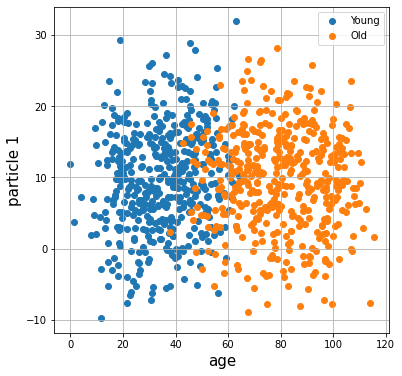

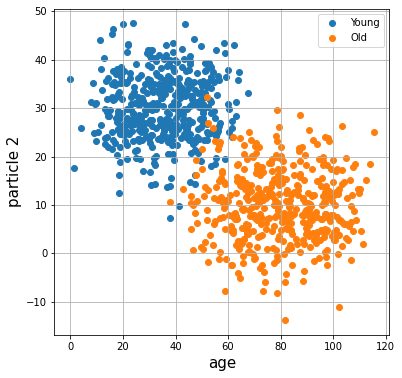

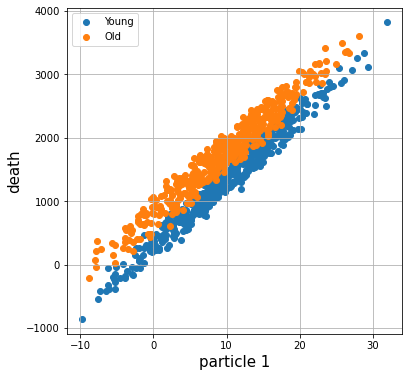

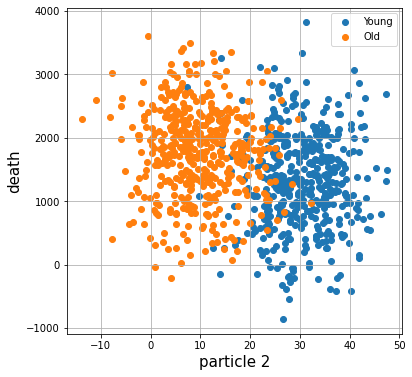

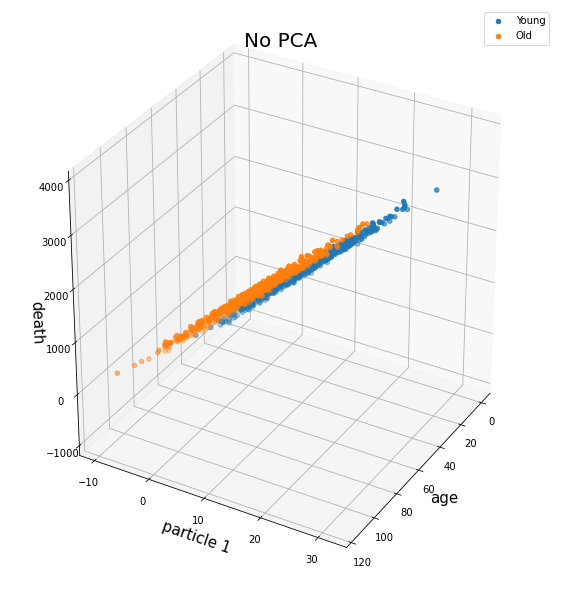

In [10]:
fig = plt.figure(figsize = (6,6), frameon = False)
ax = fig.add_subplot(1,1,1) 
targets = ['Young', 'Old']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,0], 
               df[df['label'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[1], fontsize = 15)
plt.savefig('./figures/synthetic_01.png')
plt.show()


fig = plt.figure(figsize = (6,6), frameon = False)
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,0], 
               df[df['label'] == idt].iloc[:,2])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[2], fontsize = 15)
plt.savefig('./figures/synthetic_02.png')
plt.show()

fig = plt.figure(figsize = (6,6), frameon = False)
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,1], 
               df[df['label'] == idt].iloc[:,3])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[1], fontsize = 15)
ax.set_ylabel(df.columns[3], fontsize = 15)
plt.savefig('./figures/synthetic_13.png')
plt.show()


fig = plt.figure(figsize = (6,6), frameon = False)
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,2], 
               df[df['label'] == idt].iloc[:,3])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[2], fontsize = 15)
ax.set_ylabel(df.columns[3], fontsize = 15)
plt.savefig('./figures/synthetic_23.png')
plt.show()

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=30)

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,0], 
               df[df['label'] == idt].iloc[:,1],
               df[df['label'] == idt].iloc[:,3])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[1], fontsize = 15)
ax.set_zlabel(df.columns[3], fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

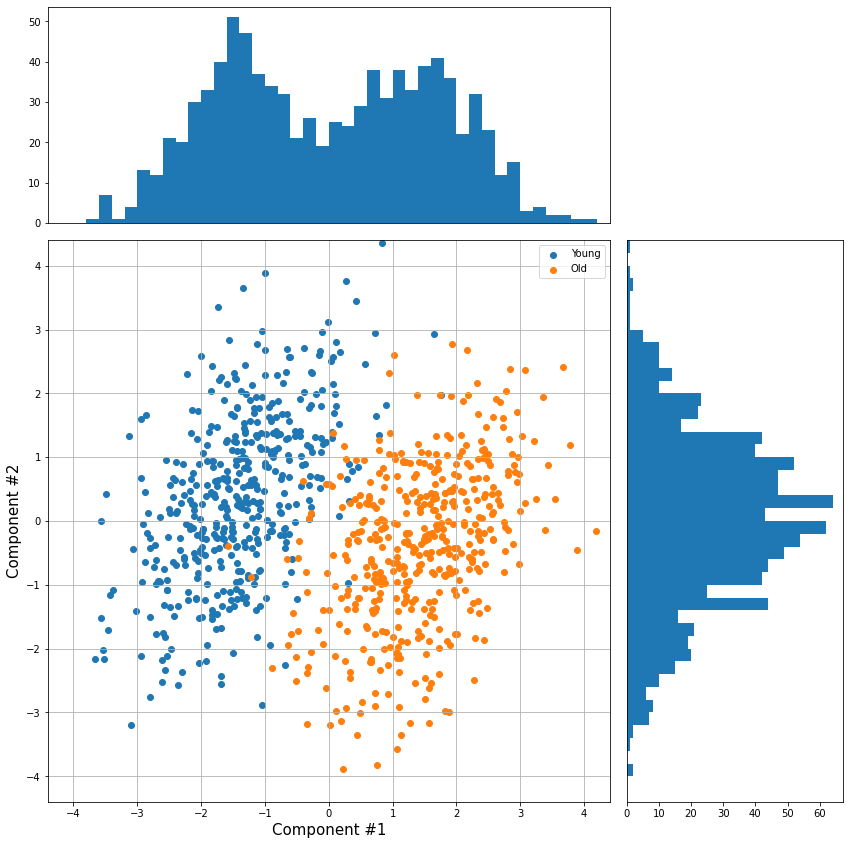

In [11]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,0], 
               PCA_df[PCA_df['label'] == idt].iloc[:,1])
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

axScatter.legend(targets)
axScatter.grid()
axScatter.set_xlabel('Component #1', fontsize = 15)
axScatter.set_ylabel('Component #2', fontsize = 15)
plt.savefig('./figures/synthetic_PCA.png')
plt.show()

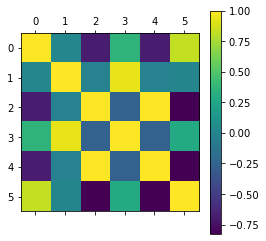

In [12]:
corrMatrix = df.iloc[:,:].corr()
cax = plt.matshow(corrMatrix)
plt.colorbar(cax)
plt.show()

-----
**Assignment #1: Report on the test of the tool on simulated and real dataThe  report  presents  the  assigned  tool  and  its  advantages,  disadvantages,  and  limitations,  bothin  a  theoretical  as  well  as  numerical  way  with  examples  using  synthetic  data  (to  show  specificcharacteristics) and real one.**

## Limitations
#### Non linearity

In [39]:
# Synthetic data
N = 900
df = pd.DataFrame()

df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 7, N)
df['particle 1'] =  np.random.normal(10, 7,N)
df['particle 2'] =  np.hstack([np.random.normal(30, 7,N//2), np.random.normal(10, 7,N//2)])
df['death'] = np.cos(df['particle 1']**2*100 + 10*df['age'])
df['other'] = df['particle 2']*25


print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()


# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)


Synthetic data


,age,particle 1,particle 2,death,other
0,13.861659,20.107556,25.625015,0.863478,640.625387
1,2.756507,7.574714,22.971662,-0.931474,574.291552
2,9.563723,6.696492,28.059647,0.875318,701.491174
3,14.084421,-1.888440,34.108467,0.459669,852.711683
4,9.625960,18.986579,35.750451,-0.309530,893.761263
...,...,...,...,...,...
895,103.872561,16.517577,-0.195017,-0.954369,-4.875420
896,110.756585,7.305955,0.173103,0.282638,4.327563
897,96.010078,11.282128,10.107176,-0.680685,252.679390
898,100.259488,13.770525,8.930837,-0.873462,223.270934


After PCA
Singular values: [4.84271026e+01 3.03809662e+01 2.96439602e+01 1.86560513e+01
 5.29421572e-15]


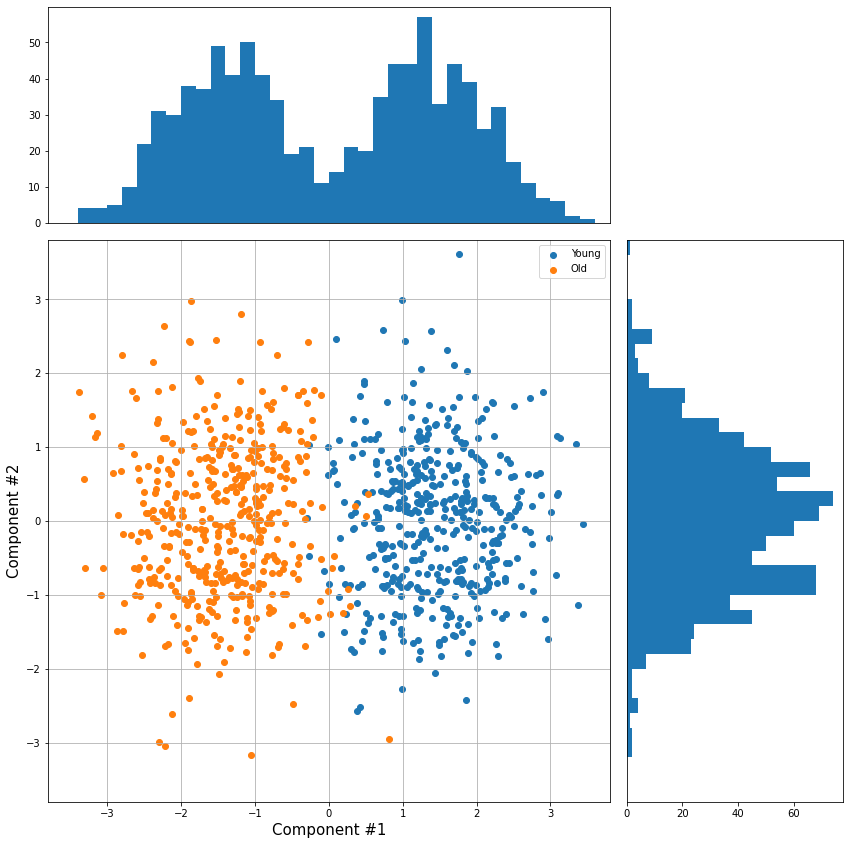

In [40]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,0], 
               PCA_df[PCA_df['label'] == idt].iloc[:,1])
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

axScatter.legend(targets)
axScatter.grid()
axScatter.set_xlabel('Component #1', fontsize = 15)
axScatter.set_ylabel('Component #2', fontsize = 15)
plt.savefig('./figures/synthetic_PCA_limitation.png')
plt.show()

#### Higher dimensionality

In [58]:
# Synthetic data
N = 900
df = pd.DataFrame()

df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 7, N)
df['particle 1'] =  np.random.normal(10, 7,N)
df['particle 2'] =  np.random.normal(10, 7,N)
df['death'] = np.random.normal(10, 7,N) + df['particle 1']
df['other'] = np.random.normal(10, 7,N) + df['particle 2']


print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()


# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)

# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)

Synthetic data


,age,particle 1,particle 2,death,other
0,14.924048,15.668911,24.369427,19.588645,45.115858
1,12.376252,-0.151006,10.327313,24.339424,31.353462
2,14.403746,17.290326,22.635572,27.881517,35.781849
3,17.765208,2.568174,2.042161,10.259016,15.257858
4,20.351115,13.352749,4.466845,22.398917,-5.561020
...,...,...,...,...,...
895,99.999393,14.319620,3.628520,19.591063,5.692271
896,103.575271,10.440205,12.287753,10.350203,9.134608
897,114.065169,21.038035,10.576895,29.089137,22.493971
898,97.212229,25.146556,15.421952,44.398416,34.378298


After PCA
Singular values: [39.8384947  38.32332648 29.90316269 16.73753045 16.274917  ]


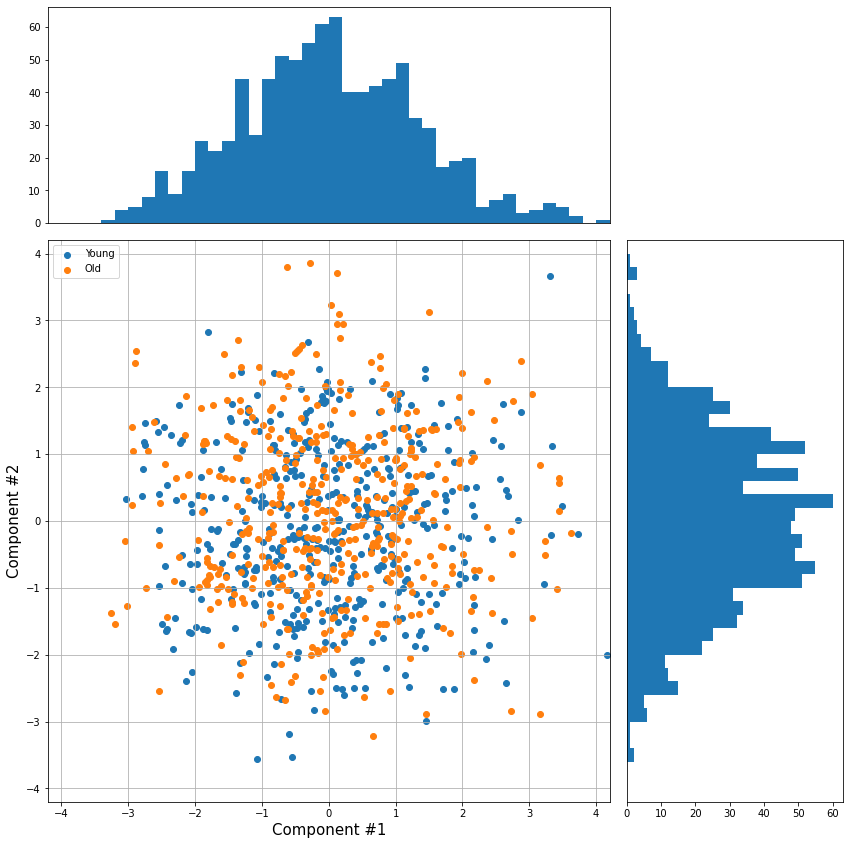

In [60]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,0], 
               PCA_df[PCA_df['label'] == idt].iloc[:,1])
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

axScatter.legend(targets)
axScatter.grid()
axScatter.set_xlabel('Component #1', fontsize = 15)
axScatter.set_ylabel('Component #2', fontsize = 15)
plt.savefig('./figures/synthetic_PCA_limitation_2.png')
plt.show()

-----
# Pour les particules:

In [9]:
df_particles = pd.read_csv('./data/Spain/Particles/data.csv')  

# We can make a tuple of the Lat and Long to store it instead of merging with the city just yet
df_particles['lat_long'] = df_particles[['SamplingPoint_Latitude','SamplingPoint_Longitude']].apply(tuple, axis=1)
df_particles

,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,Unit,BeginPosition,EndPosition,Validity,Verification,DataCoverage,DataCapture,TimeCoverage,AQValue,lat_long
0,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,95.195811,100.0,95.195811,44.284621,"(43.14406999999999, -2.96337)"
1,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1635A,SP_03014006_14_6,38.359444,-0.471944,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,97.131148,100.0,97.131148,74.287389,"(38.35944444, -0.4719444400000001)"
2,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1781A,SP_11020004_14_6,36.688550,-6.117240,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,98.178506,100.0,98.178506,80.115028,"(36.68854999999999, -6.117240000000001)"
3,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1838A,SP_28009001_14_6,40.599700,-3.503300,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,98.884335,100.0,98.884335,82.812111,"(40.5997, -3.5033)"
4,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1422A,SP_28079035_14_6,40.419167,-3.703333,Ozone (air),Summer mean,ES.BDCA.AQD,ug.m-3,2018-04-01,2018-10-01,Valid,Verified,95.833333,100.0,95.833333,54.003196,"(40.41916666, -3.70333333)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220489,Spain,2015,2019-02-21T23:02:29.616666Z,STA_ES1654A,SP_41088001_9_M,37.994350,-5.666870,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ug.m-3,2015-01-01,2016-01-01,Not valid,Verified,48.767123,100.0,48.767123,9.000000,"(37.99434999999999, -5.66687)"
220490,Spain,2015,2019-02-21T23:02:29.616666Z,STA_ES1713A,SP_48020003_9_M,43.254900,-2.902300,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ug.m-3,2015-01-01,2016-01-01,Not valid,Verified,42.191781,100.0,42.191781,9.000000,"(43.2549, -2.9023)"
220491,Spain,2015,2019-02-21T23:02:29.616666Z,STA_ES0001R,SP_45153999_64_M,39.546940,-4.350560,"Benzo(b,j)fluoranthene in PM10 (aerosol)",1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ng.m-3,2015-01-01,2016-01-01,Not valid,Verified,41.643836,100.0,41.643836,0.050000,"(39.54693999999999, -4.35056)"
220492,Spain,2015,2019-02-21T23:02:29.616666Z,STA_ES0008R,SP_33036999_64_M,43.439170,-4.850000,"Benzo(b,j)fluoranthene in PM10 (aerosol)",1 year 50 %ile of daily values in a year,ES.BDCA.AQD,ng.m-3,2015-01-01,2016-01-01,Not valid,Verified,34.520548,100.0,34.520548,0.190000,"(43.43916999999999, -4.8500000000000005)"


In [10]:
# We have several years which makes duplicated lines with different AQ values
# We can take the mean to aggregate the values for several years
gla_df = df_particles.groupby(['lat_long', 'Pollutant'], as_index=False).agg({'AQValue': 'mean'})#, 'min', 'max']})
gla_df = gla_df.drop_duplicates()
gla_df

,lat_long,Pollutant,AQValue
0,"(27.76365199999999, -15.563851)",Nitrogen dioxide (air),31.929885
1,"(27.76365199999999, -15.563851)",Nitrogen monoxide (air),46.041240
2,"(27.76365199999999, -15.563851)",Nitrogen oxides (air),103.403837
3,"(27.76365199999999, -15.563851)",Ozone (air),600.122104
4,"(27.76365199999999, -15.563851)",Particulate matter < 10 µm (aerosol),98.921208
...,...,...,...
5978,"(43.686269, -7.507778000000001)",Nitrogen monoxide (air),29.848979
5979,"(43.686269, -7.507778000000001)",Nitrogen oxides (air),61.446906
5980,"(43.686269, -7.507778000000001)",Ozone (air),499.796260
5981,"(43.686269, -7.507778000000001)",Particulate matter < 10 µm (aerosol),29.056783


In [11]:
# Unfortunatly we have a lot of pollutant mess, let us concentrate only on 10 of them for example
pollutant_lst = gla_df['Pollutant'].value_counts().nlargest(10)
pollutant_lst

Nitrogen dioxide (air)                   543
Nitrogen monoxide (air)                  542
Nitrogen oxides (air)                    540
Particulate matter < 10 µm (aerosol)     529
Sulphur dioxide (air)                    475
Ozone (air)                              466
Carbon monoxide (air)                    284
Particulate matter < 2.5 µm (aerosol)    267
Arsenic in PM10 (aerosol)                173
Nickel in PM10 (aerosol)                 173
Name: Pollutant, dtype: int64

In [12]:
# We get only the rows that are in the pollutant list
# We went from 5983 to 3992 rows :-/
gla_df = gla_df[gla_df['Pollutant'].isin(pollutant_lst.index)]
gla_df

,lat_long,Pollutant,AQValue
0,"(27.76365199999999, -15.563851)",Nitrogen dioxide (air),31.929885
1,"(27.76365199999999, -15.563851)",Nitrogen monoxide (air),46.041240
2,"(27.76365199999999, -15.563851)",Nitrogen oxides (air),103.403837
3,"(27.76365199999999, -15.563851)",Ozone (air),600.122104
4,"(27.76365199999999, -15.563851)",Particulate matter < 10 µm (aerosol),98.921208
...,...,...,...
5978,"(43.686269, -7.507778000000001)",Nitrogen monoxide (air),29.848979
5979,"(43.686269, -7.507778000000001)",Nitrogen oxides (air),61.446906
5980,"(43.686269, -7.507778000000001)",Ozone (air),499.796260
5981,"(43.686269, -7.507778000000001)",Particulate matter < 10 µm (aerosol),29.056783


In [13]:
final_df = gla_df.pivot(index='lat_long', columns='Pollutant', values='AQValue')
final_df

Pollutant,Arsenic in PM10 (aerosol),Carbon monoxide (air),Nickel in PM10 (aerosol),Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air),Ozone (air),Particulate matter < 10 µm (aerosol),Particulate matter < 2.5 µm (aerosol),Sulphur dioxide (air)
lat_long,,,,,,,,,,
"(27.76365199999999, -15.563851)",NaN,NaN,NaN,31.929885,46.041240,103.403837,600.122104,98.921208,50.261435,7.779282
"(27.772597359999992, -15.541880430000004)",NaN,NaN,NaN,28.457878,33.340514,79.478789,738.639295,94.007336,42.013627,4.243715
"(27.80127799999999, -15.461157)",NaN,0.155207,NaN,20.796244,14.876612,39.473599,1754.814896,85.045869,34.437784,4.083601
"(27.831765999999984, -17.921671)",NaN,NaN,NaN,NaN,NaN,NaN,1651.722701,131.389805,NaN,9.109979
"(27.86907, -15.38715)",NaN,NaN,NaN,16.596762,11.998870,30.508680,1506.541722,87.744303,35.123872,7.675901
...,...,...,...,...,...,...,...,...,...,...
"(43.5705, -5.9583)",NaN,0.687276,NaN,22.128702,36.435864,72.534625,237.961120,48.354297,23.770220,NaN
"(43.5792, -5.9273)",NaN,0.773120,NaN,44.758923,117.241705,225.786428,147.945248,153.581906,NaN,73.307003
"(43.6694, -7.3789)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.847705,20.770787


In [15]:
# Then merge back with help of lat_long but,
# be careful that we introduce duplicates in the pollutants values ( can easily be discarded )
foo_df = pd.merge(df_particles, final_df, left_on='lat_long', right_on='lat_long')
foo_df

,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,...,Arsenic in PM10 (aerosol),Carbon monoxide (air),Nickel in PM10 (aerosol),Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air),Ozone (air),Particulate matter < 10 µm (aerosol),Particulate matter < 2.5 µm (aerosol),Sulphur dioxide (air)
0,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,0.64124,NaN,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
1,Spain,2015,2019-02-21T23:33:40.13Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,0.64124,NaN,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
2,Spain,2016,2019-02-21T23:33:40.13Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,0.64124,NaN,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
3,Spain,2014,2019-02-21T23:46:43.556666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),AOT40 vegetation protection,ES.BDCA.AQD,...,NaN,0.64124,NaN,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
4,Spain,2011,2019-02-21T23:46:43.556666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),AOT40 vegetation protection,ES.BDCA.AQD,...,NaN,0.64124,NaN,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220473,Spain,2012,2019-02-21T23:02:29.616666Z,STA_ES1893A,SP_28079044_9_M,40.490833,-3.721111,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.101336,NaN
220474,Spain,2014,2019-02-21T23:02:29.616666Z,STA_ES1893A,SP_28079044_9_M,40.490833,-3.721111,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.101336,NaN
220475,Spain,2013,2019-02-21T23:02:29.616666Z,STA_ES1893A,SP_28079044_9_M,40.490833,-3.721111,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.101336,NaN
220476,Spain,2017,2019-07-18T14:54:28.796666Z,STA_ES1893A,SP_28079044_9_M,40.490833,-3.721111,Particulate matter < 2.5 µm (aerosol),1 year 50 %ile of daily values in a year,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.101336,NaN


In [25]:
# Get back the useful info
index_lst = foo_df[['SamplingPoint_Latitude', 'SamplingPoint_Longitude']].drop_duplicates().index.values
print("First 10 non duplicate coordinates:", index_lst[:10])
foo_df.iloc[index_lst]

# Alors au final on a bien les 655 coordonnées d'avant qui sont les 655 places ou on a relevé au moin
# un des 10 polluants de la liste principale
# J'espère que ca aidera ;-) et j'espère que c'est pas n'importe quoi ce que j'ai fait xD
# Mais 655 villes/positions ca me semble pas mal je penses

First 10 non duplicate coordinates: [   0  415 1176 1584 1924 2304 2569 3005 3458 3820]


,CountryOrTerritory,ReportingYear,UpdateTime,StationLocalId,SamplingPointLocalId,SamplingPoint_Latitude,SamplingPoint_Longitude,Pollutant,AggregationType,Namespace,...,Arsenic in PM10 (aerosol),Carbon monoxide (air),Nickel in PM10 (aerosol),Nitrogen dioxide (air),Nitrogen monoxide (air),Nitrogen oxides (air),Ozone (air),Particulate matter < 10 µm (aerosol),Particulate matter < 2.5 µm (aerosol),Sulphur dioxide (air)
0,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1349A,SP_01036004_14_6,43.144070,-2.963370,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,0.641240,NaN,31.954771,49.270782,106.857367,597.947535,41.222275,NaN,13.404878
415,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1635A,SP_03014006_14_6,38.359444,-0.471944,Ozone (air),Summer mean,ES.BDCA.AQD,...,1.200297,0.440230,4.862131,48.742742,94.408738,192.778890,3297.864069,27.511125,NaN,5.132375
1176,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1781A,SP_11020004_14_6,36.688550,-6.117240,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,0.652394,NaN,35.514465,69.569465,140.174074,6653.664333,42.722351,NaN,7.473219
1584,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1838A,SP_28009001_14_6,40.599700,-3.503300,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,0.434674,NaN,38.940881,32.952192,85.415934,8288.928348,34.873182,28.238964,NaN
1924,Spain,2018,2019-08-31T18:56:10.456666Z,STA_ES1422A,SP_28079035_14_6,40.419167,-3.703333,Ozone (air),Summer mean,ES.BDCA.AQD,...,NaN,0.780421,NaN,61.711919,123.598114,256.739986,3961.805346,NaN,NaN,14.429464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220310,Spain,2014,2019-02-21T22:44:42.34Z,STA_ES1839A,SP_08051003_10_M,41.617900,2.087100,Particulate matter < 10 µm (aerosol),1 year day exceed 50,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.132734,NaN,NaN
220366,Spain,2014,2019-02-21T22:44:42.34Z,STA_ES1872A,SP_08187014_10_M,41.548225,2.105157,Particulate matter < 10 µm (aerosol),1 year day exceed 50,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.284648,NaN,NaN
220398,Spain,2017,2019-07-18T14:54:50Z,STA_ES2079A,SP_08279014_10_M,41.600000,2.000000,Particulate matter < 10 µm (aerosol),1 year 90.41 percentile,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.997228,NaN,NaN
220414,Spain,2016,2019-02-21T23:20:53.58Z,STA_ES1994A,SP_07040005_9_M,39.573130,2.646460,Particulate matter < 2.5 µm (aerosol),1 year day min,ES.BDCA.AQD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.006206,NaN
